### knn

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# IRIS 데이터셋 로드
iris = load_iris()

# 특성과 타겟 데이터 분할
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# KNN 모델 초기화 및 파라미터 설정
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=1)

# 모델 학습
knn.fit(X_train, y_train)

# 분류 결과 예측
y_pred = knn.predict(X_test)

# 분류 결과 평가
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 탐색할 파라미터 그리드 정의
param_grid = {
    'n_neighbors' : [1, 3, 5], # 이웃의 수
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'] # 가중치 함수
}

# GridSearchCV를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']})

In [4]:
# 최적 파라미터 확인
best_params = grid_search.best_params_
print('Best Parmeters :', best_params)

# 최적 파라미터로 훈련된 모델 사용하여 예측
y_pred = grid_search.predict(X_test)

# 분류 결과 평가
report = classification_report(y_test, y_pred)
print("Classification Report : ")
print(report)

Best Parmeters : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



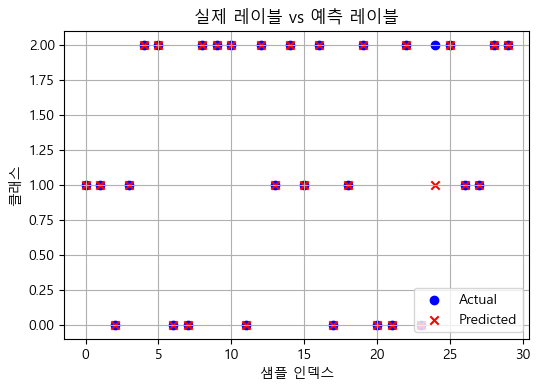

In [8]:
import matplotlib.pyplot as plt

# matplotlib 한글 깨짐 방지
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, marker='x', c='red', label='Predicted')
plt.title("실제 레이블 vs 예측 레이블")
plt.xlabel("샘플 인덱스")
plt.ylabel("클래스")
plt.legend()
plt.grid(True)
plt.show()


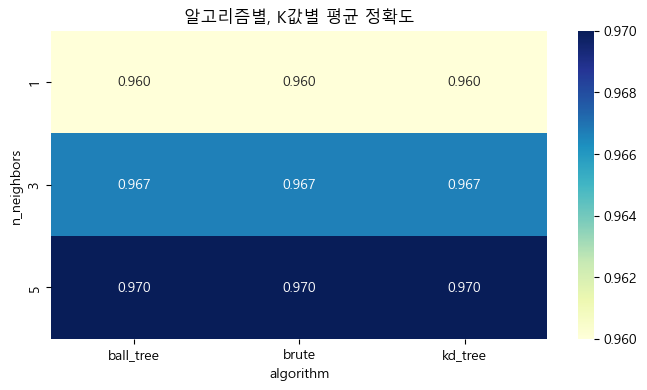

In [9]:
import seaborn as sns
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values="mean_test_score", 
    index="param_n_neighbors", 
    columns="param_algorithm"
)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("알고리즘별, K값별 평균 정확도")
plt.xlabel("algorithm")
plt.ylabel("n_neighbors")
plt.show()


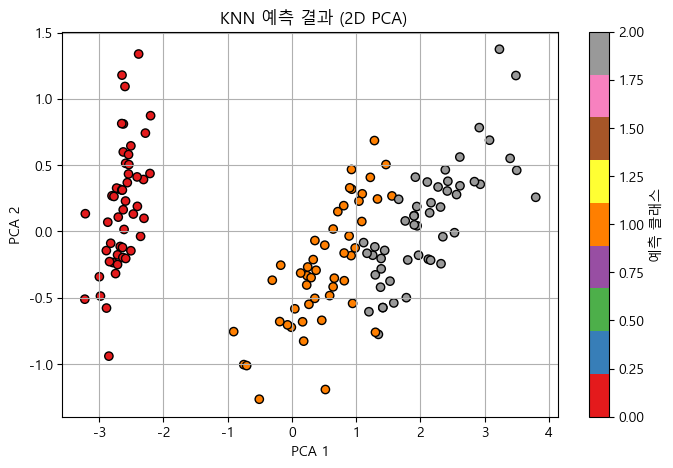

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 최적 모델을 기반으로 예측
y_all_pred = grid_search.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_all_pred, cmap='Set1', edgecolor='k')
plt.title(" KNN 예측 결과 (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(label='예측 클래스')
plt.show()


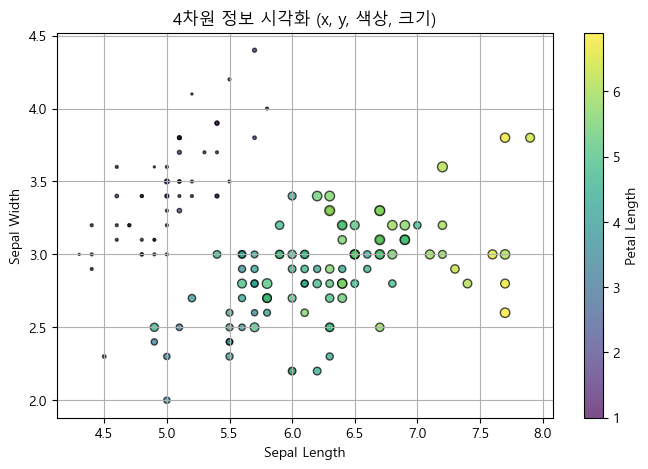

In [11]:
import matplotlib.pyplot as plt

# 예시: iris 데이터에서 4개 feature 중 2개는 위치(x, y), 나머지 2개는 색상(c), 점 크기(s)
x = X[:, 0]  # sepal length
y = X[:, 1]  # sepal width
color = X[:, 2]  # petal length
size = X[:, 3] * 20  # petal width

plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=color, s=size, cmap="viridis", alpha=0.7, edgecolor='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("4차원 정보 시각화 (x, y, 색상, 크기)")
plt.colorbar(scatter, label="Petal Length")
plt.grid(True)
plt.show()


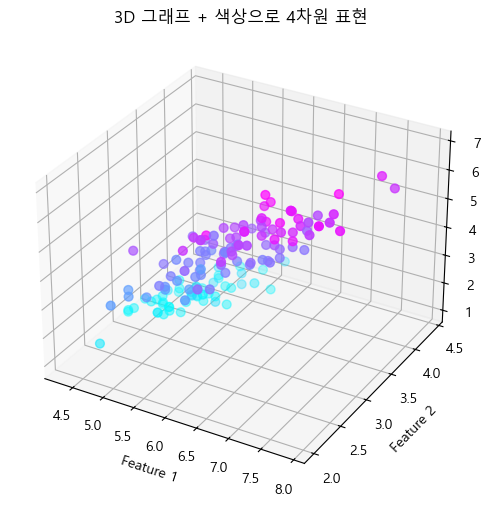

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,3], cmap='cool', s=40)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D 그래프 + 색상으로 4차원 표현")
plt.show()


📌 KNN(K-최근접 이웃) 알고리즘 정리

1. KNN이란?
- 지도 학습(Supervised Learning)에 속하는 알고리즘
- 새로운 데이터가 어떤 클래스/값에 속할지를 예측할 때, 가장 가까운 K개의 데이터를 참고

2. 핵심 개념
- K: 참고할 이웃의 개수 (보통 홀수, 너무 작으면 과적합, 너무 크면 과소적합)
- 거리 계산: 보통 유클리디안 거리 사용
    d = √((x₁ - x₂)² + (y₁ - y₂)² + ...)
- 예측 방식:
    · 분류(Classification): K개 중 다수결 클래스 선택
    · 회귀(Regression): K개의 평균값으로 예측

3. 작동 과정
① 학습 데이터 준비 (입력 특성 + 정답 레이블)
② 예측할 새로운 데이터 입력
③ 모든 학습 데이터와 거리 계산
④ 거리 기준으로 K개 이웃 선택
⑤ 다수결 또는 평균으로 결과 예측

4. 장단점
[장점]
- 구현이 간단하고 직관적임
- 분류/회귀 모두 가능
- 학습 필요 없이 실시간 예측 가능

[단점]
- 모든 거리 계산 → 느림 (속도 문제)
- 고차원에서는 성능 저하 (차원의 저주)
- 특성 간 스케일 차이가 있으면 정확도 감소 (정규화 필요)

5. 실습 예시 요약
- 영화 평점 데이터를 활용한 회귀 예측
- New 사람의 영화 취향을 기존 사람과 비교
- 거리 기준 가장 가까운 K명 선택 → 평점 평균으로 예측

💡 핵심: K개의 '가장 가까운' 이웃을 기준으로 예측하는 간단하지만 강력한 알고리즘


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Breast Cancer 데이터셋 로드
breast_cancer = load_breast_cancer()

# 특성 데이터와 타겟 데이터
X = breast_cancer.data
y = breast_cancer.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# KNN 모델 초기화
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2, # 유클리디언 거리
                           metric='minkowski',
                           n_jobs=None)

# 모델 학습
knn.fit(X_train, y_train)

# 분류 결과 예측
y_pred = knn.predict(X_test)

# 평가 리포트 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



KNN vs Logistic Regression (with GridSearchCV)

In [6]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


# 생략 없이 모두 출력
pd.set_option('display.max_rows', None)       # 모든 행 출력
pd.set_option('display.max_columns', None)    # 모든 열 출력
pd.set_option('display.max_colwidth', None)   # 컬럼 내용 길이 제한 없음
pd.set_option('display.width', 0)             # 자동 줄바꿈 비활성화

# 함수 정의: 하나의 데이터셋에 대해 평가
def evaluate_models(dataset_loader, dataset_name):
    data = dataset_loader()
    X, y = data.data, data.target

    # 학습/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # KNN 모델: GridSearchCV로 최적 파라미터 탐색
    param_grid = {
        'n_neighbors': [1, 3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }
    knn = KNeighborsClassifier()
    grid_knn = GridSearchCV(knn, param_grid, cv=5)
    grid_knn.fit(X_train_scaled, y_train)

    # 최적 모델로 평가
    knn_best_params = grid_knn.best_params_
    knn_best_model = grid_knn.best_estimator_
    y_pred_knn = knn_best_model.predict(X_test_scaled)
    knn_acc = accuracy_score(y_test, y_pred_knn)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log = log_reg.predict(X_test_scaled)
    log_acc = accuracy_score(y_test, y_pred_log)

    # 결과 반환
    return {
        "dataset": dataset_name,
        "KNN Best Params": knn_best_params,
        "KNN Accuracy": knn_acc,
        "LogReg Accuracy": log_acc
    }

# 데이터셋별 실행
results = [
    evaluate_models(load_iris, "Iris"),
    evaluate_models(load_breast_cancer, "Breast Cancer")
]

# 결과 테이블 출력
results_df = pd.DataFrame(results)
print(results_df)


         dataset  \
0           Iris   
1  Breast Cancer   

                                                  KNN Best Params  \
0   {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}   
1  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}   

   KNN Accuracy  LogReg Accuracy  
0      1.000000         1.000000  
1      0.947368         0.973684  


📋 모든 파라미터 조합 결과:
                                                                 params  \
3        {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}   
2         {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}   
7        {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}   
11  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}   
10   {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}   
15  {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}   
18     {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'uniform'}   
19    {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}   
23    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}   
8    {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}   
5        {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}   
9   {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}   
14   {'a

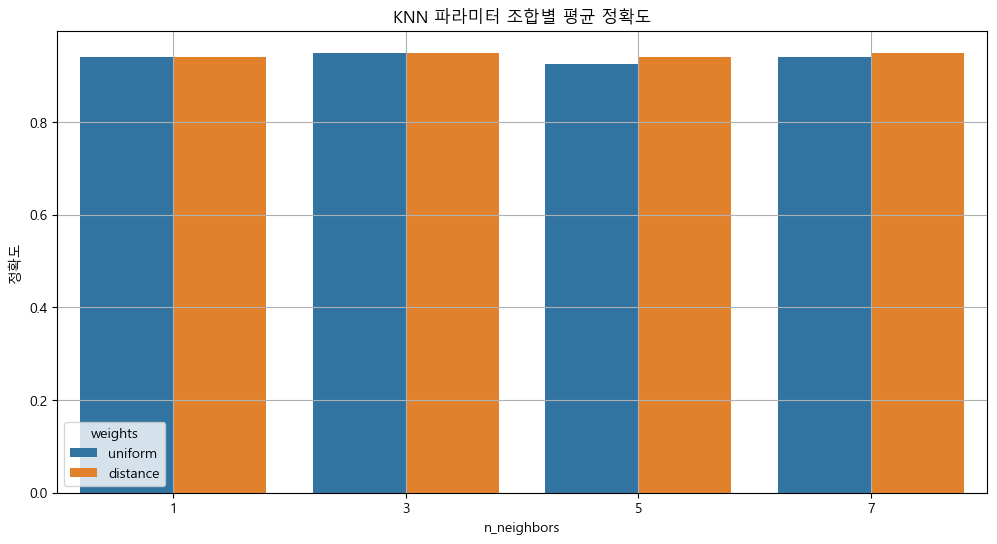

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 생략 없이 모두 출력
pd.set_option('display.max_rows', None)       # 모든 행 출력
pd.set_option('display.max_columns', None)    # 모든 열 출력
pd.set_option('display.max_colwidth', None)   # 컬럼 내용 길이 제한 없음
pd.set_option('display.width', 0)             # 자동 줄바꿈 비활성화

# 1. 데이터 로드 및 전처리
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 파라미터 탐색을 위한 Grid 정의
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# 3. GridSearchCV 실행
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# 4. 전체 결과 DataFrame으로 보기
results_df = pd.DataFrame(grid_search.cv_results_)

# 5. 보기 좋게 추려서 출력
summary = results_df[[
    'params', 'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values(by='rank_test_score')

print("📋 모든 파라미터 조합 결과:")
print(summary)

# 6. 추가: 시각화용 컬럼 분리
results_df['n_neighbors'] = results_df['param_n_neighbors']
results_df['weights'] = results_df['param_weights']
results_df['algorithm'] = results_df['param_algorithm']

# 7. 시각화 예시 (선택)
plt.figure(figsize=(12, 6))
sns.barplot(x='n_neighbors', y='mean_test_score', hue='weights', data=results_df)
plt.title("KNN 파라미터 조합별 평균 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.grid(True)
plt.show()
